In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences





In [10]:

# Parameters
max_features = 20000  # Number of words to consider as features
max_len = 200  # Maximum length of sequences
batch_size = 32
epochs = 5

# Load IMDb movie review dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)






In [11]:
# Define the model
model = Sequential()
model.add(Embedding(max_features, 128))  # Removed input_length parameter
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.7444 - loss: 0.5005 - val_accuracy: 0.8663 - val_loss: 0.3141
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.9154 - loss: 0.2318 - val_accuracy: 0.8550 - val_loss: 0.3511
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9369 - loss: 0.1765 - val_accuracy: 0.8673 - val_loss: 0.3632
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.9640 - loss: 0.1023 - val_accuracy: 0.8632 - val_loss: 0.4332
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.9763 - loss: 0.0689 - val_accuracy: 0.8588 - val_loss: 0.4883


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8581 - loss: 0.4924
Test Loss: 0.48831894993782043
Test Accuracy: 0.8588155508041382


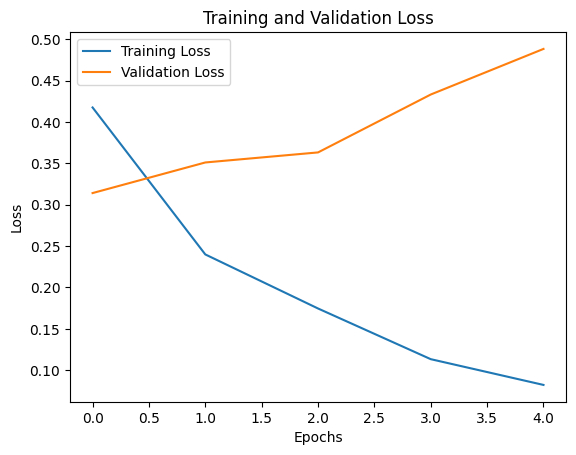

In [14]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



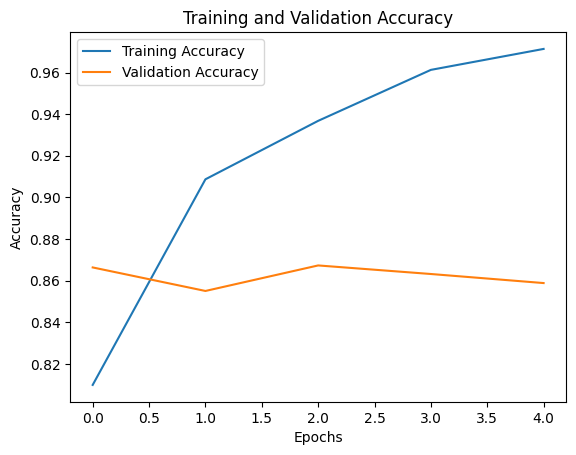

In [15]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

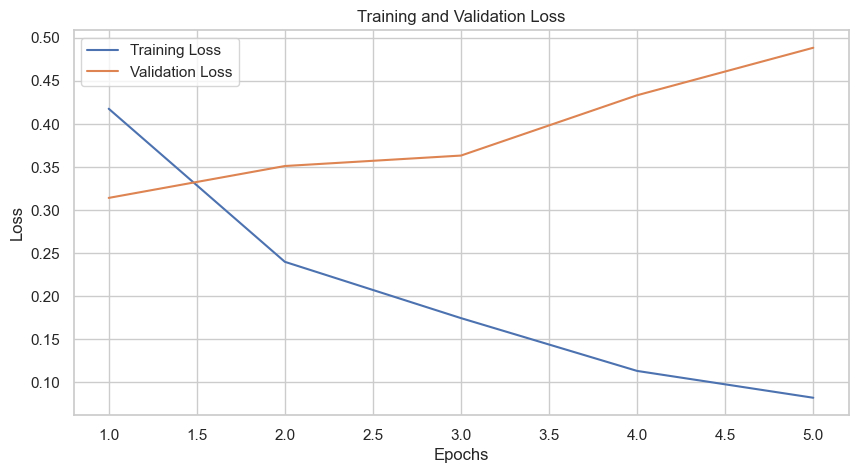

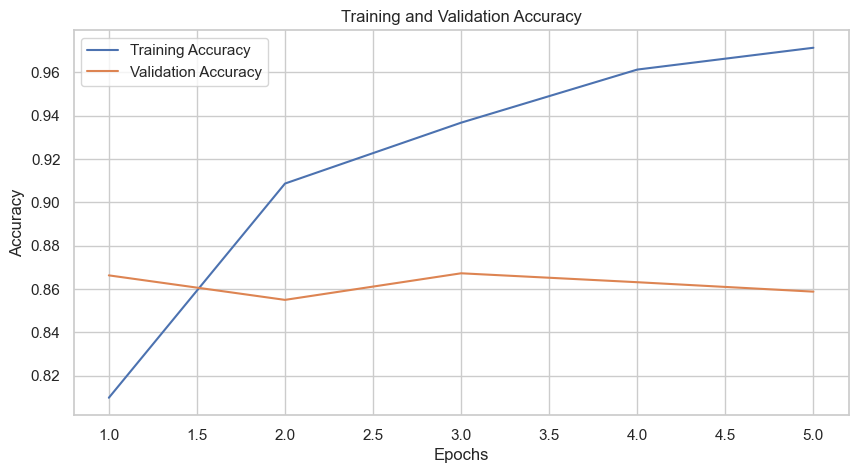

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot training and validation loss using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, epochs + 1), y=history.history['loss'], label='Training Loss')
sns.lineplot(x=range(1, epochs + 1), y=history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy using Seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, epochs + 1), y=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(x=range(1, epochs + 1), y=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
